## Блок 4. 
## Введение в машинное обучение ML-2. Обучение с учителем: регрессия 

### 2. Линейная регрессия: аналитическое решение



Вот какие этапы нам предстоит пройти, чтобы построить свою модель:

        1. Загрузить данные и проанализировать датасет на предмет пропусков.
        2. Подготовить данные для подачи в модель: избавиться от пропусков, если они есть, и перекодировать категориальные признаки, если они представлены текстом.
        3. Построить модель. Будем строить несколько моделей линейной регрессии: первую — на одном признаке, вторую — на всех доступные признаках.
        4. Оценить качество модели.


In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

In [2]:
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

c:\Users\alex\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

В данном описании говорится, что у нас есть 506 участков с жилыми домами, которые описываются 13-ю признаками.   
На каждом из участков находится несколько домов.   
Измерены общие показатели по каждому из участков, в том числе медианная стоимость.

#### Краткое описание признаков набора данных.   



        CRIM — уровень преступности на душу населения по городам.;
        ZN — доля земли под жилую застройку, разделённая на участки площадью более 25 000 кв. футов;
        INDUS — доля акров, которые принадлежат предприятиям, не связанным с розничной торговлей, на город;
        CHAS —фиктивная переменная реки Чарльз (1 — если участок прилегает к реке; 0 — в противном случае);
        NOX —концентрация оксидов азота (в десятимиллионных долях);
        RM —среднее количество комнат в доме;
        AGE —доля зданий, построенных до 1940 г. и занимаемых владельцами;
        DIS — взвешенные расстояния до пяти бостонских центров занятости;
        RAD — индекс доступности радиальных автомобильных дорог;
        TAX — полная ставка налога на имущество за каждые 10 000 долларов стоимости;
        PTRATIO — соотношение учеников и учителей по городам;
        B — 1000 (Bk — 0.63) , где Bk — доля граждан афроамериканского происхождения по городам;
        LSTAT — процент населения с низким статусом;
        MEDV — медианное значение стоимости домов, занимаемых владельцами, в тысячах долларов США (целевой признак).

Составим DataFrame из наших данных.   
Для этого обратимся по ключу 'data' к загруженным данным и получим numpy-массив, в котором содержится информация обо всех признаках, а по ключу 'feature_names' содержатся названия признаков.    Обратившись по ключу 'target', можно получить numpy-вектор со значениями целевой переменной — медианной стоимости занимаемых домов (MEDV).   

In [3]:
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Выведем информацию о таблице boston_data с помощью метода info():
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Также модель не умеет работать с категориальными признаками, представленными в виде типа object. 
Прежде чем подавать в модель линейной регрессии категориальные признаки, 
необходимо произвести кодировку категорий с помощью уже знакомых вам методов кодирования.

→ Давайте начнём с простого. Построим линейную регрессию на одном признаке. 
Выберем признак, который имеет наиболее высокую линейную взаимосвязь. 
Для этого рассчитаем корреляцию признаков с целевой переменной и выберем наиболее влиятельный.

Для лучшего восприятия давайте построим столбчатую диаграмму для модульного значения корреляций:

Примечание. Мы могли визуализировать матрицу корреляций, однако сейчас нас интересует только связь факторов с целевым признаком, 
поэтому нагляднее будет воспользоваться столбчатой диаграммой.

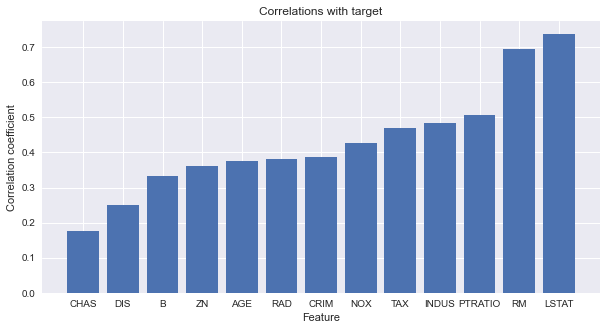

In [7]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Итак, самый коррелированный по модулю с медианной ценой (MEDV) признак — процент населения с низким статусом (LSTAT).   
Давайте построим линейную регрессию, используя этот признак.

Примечание. Построить линейную регрессию = обучить линейную регрессию = найти её параметры.

Вспоминаем нашу формулу аналитического решения по методу наименьших квадратов:

w = (X^{T}X)^{-1} X^{T}y = QX^{T}y

Что есть X и y? 
Это матрица из примеров (матрица наблюдений) и вектор правильных ответов к ним соответственно. 
У нас матрица — это таблица, состоящая из одного столбца (LSTAT), а — столбец с медианными ценами (MEDV):

In [8]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
X.head()
#y.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
